# K-Armed Bandit testbed

In this exersise we'll implement the various algorithms we disussed in the course. To test the algorithms we'll follow the procedure followed in the Section2.3 of [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/RLbook2018.pdf). We use a set of 2000 randomly generated K-armmed bandit, with k = 10. For each of the K-armed bandit problem, the true action value $q_*$ is selected accoring to a normal distribution with mean 0 and variance 1. This makes up the the environment 

For any algorithm, we measure the permoramance and behaviour over 1000 steps. We do this run for all 2000 bandit problems. We measure the overall performance at each step, by averaging out the measures form all 2000 bandit problems.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import plots
import sys

%matplotlib inline

## K-Armed Bandit environment

In [13]:
class k_armed_bandit(object):
    def __init__(self, k : int = 10, plot_distribution : bool = False) -> None:
        '''
        @parameters
        k                 :     Number of bandits
        plot_distribution :     Boolean flag to check if we need to visualize the actual distribution of each bandit.

        
        @doc
        Number of actions is actually to the number of bandits (from definition).
        true_action_value is selected for each of the action according to a normal distribution 
        with mean zero and unit variance. These are the true rewards for each of the k bandits/actions. 
        '''
        self.num_actions = k
        self.true_action_value = np.random.normal(0,1,size = self.num_actions)
        if(plot_distribution):
            reward_distribution = [np.random.normal(action_value,1,2000) for action_value in self.true_action_value]
            fig = plt.figure()
            plt.violinplot(reward_distribution, showmeans=True)
            plt.axhline(y=0, color='gray',linestyle='--')
            plt.xlabel("Action")
            plt.ylabel("Reward Distribution")
            plt.xticks(np.arange(0,11))
            plt.show()
            
    def step(self, action : int) -> float:
        '''
        @parameters
        action : action to take (integer in range)
        
        @returns
        The reward for taking the action
        '''
        assert action>=0 and action<self.num_actions
        value = np.random.normal(self.true_action_value[action], 1, 1)
        return value[0]

#### Plot of one bandit problem

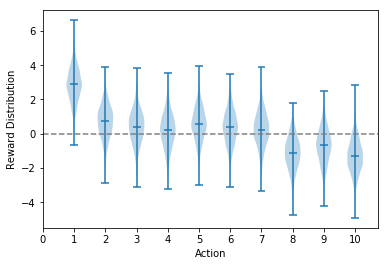

In [21]:
k_armed_bandit(plot_distribution = True)

In [11]:
#Store the rewards and optimal actions for each algorithm. Used to plot the graphs
rewards_dict = dict()
optimal_actions_dict = dict()

## Greedy Algorithm

<img src="images/M1A1-P1.png" alt="M4A1-P3" width="500"/>

In [24]:
#Define greedy agent class
class greedy_agent(object):
    def __init__(self, env : k_armed_bandit) -> None:
        self.env = env
        self.num_actions = self.env.num_actions
        self.q = np.zeros(self.num_actions)
        self.action_counts = np.zeros(self.num_actions)
    
    def select_action(self) -> int:
        action = np.argmax(self.q)
        return action
    
    def update_q_values(self, action : int, reward : float) -> None:
        self.action_counts[action] = self.action_counts[action] + 1
        self.q[action] = self.q[action] + (1.0/self.action_counts[action]) * (reward - self.q[action])

Episode 2000/2000.

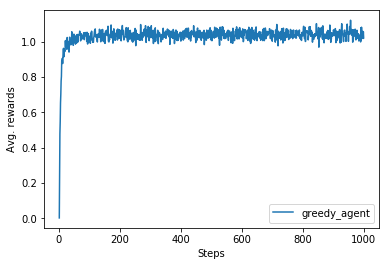

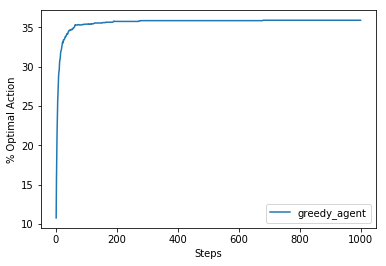

In [25]:
#Play with greedy agent
num_episodes = 2000
max_num_steps = 1000

all_rewards = []
all_optimal_actions = []
for episode in range(num_episodes):
    if((episode+1)%10 == 0):
        print("\rEpisode {}/{}.".format(episode+1, num_episodes), end="")
        sys.stdout.flush()
    env = k_armed_bandit()
    agent = greedy_agent(env)
    rewards = []
    optimal_actions = []
    for step in range(max_num_steps):
        action = agent.select_action()
        if(action == np.argmax(env.true_action_value)):
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        reward = env.step(action)
        agent.update_q_values(action, reward)
        rewards.append(reward)
    all_rewards.append(rewards)
    all_optimal_actions.append(optimal_actions)

rewards_dict['greedy_agent'] = all_rewards
optimal_actions_dict['greedy_agent'] = all_optimal_actions

plots.plot_avg_rewards(rewards_dict)
plots.plot_optimal_actions(optimal_actions_dict)

## Epsilon greedy algorithm

<img src="images/M1A1-P2.png" alt="M4A1-P3" width="500"/>

In [26]:
#Define epsilon greedy agent class
class epsilon_greedy_agent(object):
    def __init__(self, env : k_armed_bandit, epsilon : float) -> None:
        self.env = env
        self.num_actions = self.env.num_actions
        self.q = np.zeros(self.num_actions)
        self.action_counts = np.zeros(self.num_actions)
        self.epsilon = epsilon
        pass
    
    def select_action(self) -> int:
        e = np.random.random(1)[0]
        if(e < self.epsilon):
            action = np.random.randint(0, self.num_actions)
        else:
            best_q = np.max(self.q)
            action = np.random.choice(np.where(self.q == best_q)[0])
        return action
    
    def update_q_values(self, action : int, reward : float) -> None:
        self.action_counts[action] = self.action_counts[action] + 1
        self.q[action] = self.q[action] + (1.0/self.action_counts[action])*(reward - self.q[action])

Episode 2000/2000.

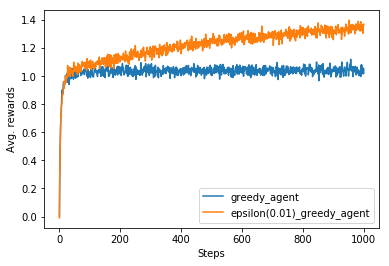

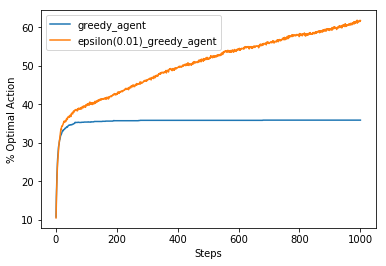

In [27]:
#Play with epsilon greedy agent (epsilon = 0.01)
num_episodes = 2000
max_num_steps = 1000

all_rewards = []
all_optimal_actions = []
for episode in range(num_episodes):
    if((episode+1)%10 == 0):
        print("\rEpisode {}/{}.".format(episode+1, num_episodes), end="")
        sys.stdout.flush()
    env = k_armed_bandit()
    agent = epsilon_greedy_agent(env, epsilon = 0.01)
    rewards = []
    optimal_actions = []
    for step in range(max_num_steps):
        action = agent.select_action()
        if(action == np.argmax(env.true_action_value)):
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        reward = env.step(action)
        agent.update_q_values(action, reward)
        rewards.append(reward)
    all_rewards.append(rewards)
    all_optimal_actions.append(optimal_actions)

rewards_dict['epsilon(0.01)_greedy_agent'] = all_rewards
optimal_actions_dict['epsilon(0.01)_greedy_agent'] = all_optimal_actions

plots.plot_avg_rewards(rewards_dict)
plots.plot_optimal_actions(optimal_actions_dict)


Episode 2000/2000.

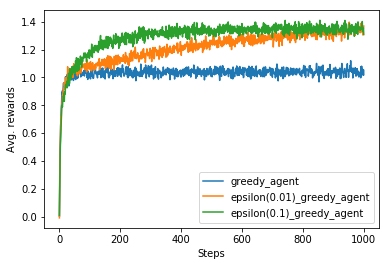

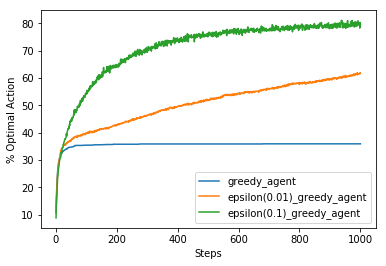

In [28]:
#Play with epsilon greedy agent (epsilon = 0.1)
num_episodes = 2000
max_num_steps = 1000

all_rewards = []
all_optimal_actions = []
for episode in range(num_episodes):
    if((episode+1)%10 == 0):
        print("\rEpisode {}/{}.".format(episode+1, num_episodes), end="")
        sys.stdout.flush()
    env = k_armed_bandit()
    agent = epsilon_greedy_agent(env, epsilon = 0.1)
    rewards = []
    optimal_actions = []
    for step in range(max_num_steps):
        action = agent.select_action()
        if(action == np.argmax(env.true_action_value)):
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        reward = env.step(action)
        agent.update_q_values(action, reward)
        rewards.append(reward)
    all_rewards.append(rewards)
    all_optimal_actions.append(optimal_actions)

rewards_dict['epsilon(0.1)_greedy_agent'] = all_rewards
optimal_actions_dict['epsilon(0.1)_greedy_agent'] = all_optimal_actions

plots.plot_avg_rewards(rewards_dict)
plots.plot_optimal_actions(optimal_actions_dict)


## Decaying epsilon greedy algorithm

<img src="images/M1A1-P3.png" alt="M4A1-P3" width="500"/>

In [ ]:


#Define decaying epsilon greedy agent class
class decaying_epsilon_greedy_agent(object):
    def __init__(self, env : k_armed_bandit, max_epsilon : float, min_epsilon : float, decay : float) -> None:
        '''
        Implement this
        '''
        pass
    
    def select_action(self) -> int:
        '''
        Implement this
        '''
        pass
    
    def update_q_values(self, action : int, reward : float) -> None:
        '''
        Implement this
        '''
        pass

In [ ]:
#Play with decaying epsilon greedy agent class
num_episodes = 2000
max_num_steps = 1000

all_rewards = []
all_optimal_actions = []
for episode in range(num_episodes):
    if((episode+1)%10 == 0):
        print("\rEpisode {}/{}.".format(episode+1, num_episodes), end="")
        sys.stdout.flush()
    env = k_armed_bandit()
    agent = decaying_epsilon_greedy_agent(env, min_epsilon = 0.05, max_epsilon = 1, decay = 0.999999)
    rewards = []
    optimal_actions = []
    for step in range(max_num_steps):
        action = agent.select_action()
        if(action == np.argmax(env.true_action_value)):
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        reward = env.step(action)
        agent.update_q_values(action, reward)
        rewards.append(reward)
    all_rewards.append(rewards)
    all_optimal_actions.append(optimal_actions)

rewards_dict['decaying_epsilon_greedy_agent'] = all_rewards
optimal_actions_dict['decaying_epsilon_greedy_agent'] = all_optimal_actions

plots.plot_avg_rewards(rewards_dict)
plots.plot_optimal_actions(optimal_actions_dict)

## Upper Confidence Bounds - UCB1

<img src="images/M1A1-P4.png" alt="M4A1-P3" width="500"/>

In [ ]:
#Define UCB1 agent class
class ucb1_agent(object):
    def __init__(self, env : k_armed_bandit) -> None:
        '''
        Implement this
        '''
        pass
    
    def select_action(self) -> int:
        '''
        Implement this
        '''
        pass
    
    def update_q_values(self, action : int, reward : float) -> None:
        '''
        Implement this
        '''
        pass

In [ ]:
#Play with UCB1 agent class
num_episodes = 2000
max_num_steps = 1000

all_rewards = []
all_optimal_actions = []
for episode in range(num_episodes):
    if((episode+1)%10 == 0):
        print("\rEpisode {}/{}.".format(episode+1, num_episodes), end="")
        sys.stdout.flush()
    env = k_armed_bandit()
    agent = ucb1_agent(env)
    rewards = []
    optimal_actions = []
    for step in range(max_num_steps):
        action = agent.select_action()
        if(action == np.argmax(env.true_action_value)):
            optimal_actions.append(1)
        else:
            optimal_actions.append(0)
        reward = env.step(action)
        agent.update_q_values(action, reward)
        rewards.append(reward)
    all_rewards.append(rewards)
    all_optimal_actions.append(optimal_actions)

rewards_dict['ucb1_agent'] = all_rewards
optimal_actions_dict['ucb1_agent'] = all_optimal_actions

plots.plot_avg_rewards(rewards_dict)
plots.plot_optimal_actions(optimal_actions_dict)